# Bigger Regex Examples

## 1. Git Logs

In [2]:
from subprocess import check_output

In [5]:
output = check_output(["git", "log"])
type(output)

bytes

In [9]:
output_str = str(output, "utf-8")
type(output_str)

str

In [13]:
print(output_str[:400])

commit a2e8559bd376a7c5d71a9b6ee134377074f94f92
Author: tylerharter <tylerharter@gmail.com>
Date:   Sat Mar 26 13:22:00 2022 -0500

    release lab 10

commit c579fba91276d0c0917f1e7c38b1d7508aa9dda7
Author: tylerharter <tylerharter@gmail.com>
Date:   Sat Mar 26 13:20:37 2022 -0500

    release lab 10

commit 67fe330e970d73caa5a2898ed244bcca11eba492
Merge: 7704410 4637d21
Author: Tyler <tharter@wi


In [14]:
# examples: commit nums, days of week, author names, every line mentioning a project

In [15]:
import re

In [23]:
#commits = re.findall(r"((\d|a|b|c|e|f){32})", output_str)
#commits

In [18]:
commits = re.findall(r"[\da-f]{32}", output_str)
commits[:5]

['a2e8559bd376a7c5d71a9b6ee1343770',
 'c579fba91276d0c0917f1e7c38b1d750',
 '67fe330e970d73caa5a2898ed244bcca',
 '7704410dcb324b0894b635c4113592a8',
 '4637d216c2b07b7e83b35c6ad48d0368']

In [29]:
# days of week
re.findall("Date:\s*(\w+)\s*(\w+)", output_str)[:5]

[('Sat', 'Mar'),
 ('Sat', 'Mar'),
 ('Sat', 'Mar'),
 ('Sat', 'Mar'),
 ('Thu', 'Mar')]

In [31]:
days = re.findall("Date:\s*(\w+)", output_str)
days[:5]

['Sat', 'Sat', 'Sat', 'Sat', 'Thu']

In [33]:
import pandas as pd
pd.Series(days).value_counts()

Mon    34
Tue    26
Sat    20
Thu    20
Wed    17
Fri    12
Sun     2
dtype: int64

<AxesSubplot:>

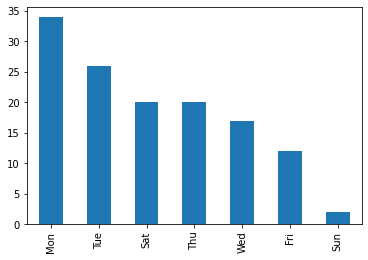

In [34]:
pd.Series(days).value_counts().plot.bar()

In [39]:
#print(output_str)
authors = re.findall(r"Author:\s*(.+?)\s*<", output_str)
authors[:10]

['tylerharter',
 'tylerharter',
 'Tyler',
 'Tyler',
 'tylerharter',
 'Tyler',
 'Garrison Waugh',
 'Garrison Waugh',
 'tylerharter',
 'tylerharter']

In [44]:
# find every line that mentions a project (p1, P2, ...)
lines = re.findall(r".*[pP]\d+.*", output_str)
lines = [line.strip() for line in lines]
lines

['p4 tips',
 'p4 release',
 'p4 updates',
 'P4 tester',
 'un-release P4',
 'p4 draft',
 'Changed s22 README.md back to original README.md. Was accidentally changed to hold p3 draft instead of nav links.',
 'release p3',
 'p3 updates',
 'p3 updates',
 'p3 screenshot',
 'p3 updates',
 'complete p3 tester',
 'p3 draft',
 'p2 corrections',
 'Correction to p2 Q7',
 'p2 updates',
 'p2 updates',
 'release P2',
 'p2 testing info',
 '320 p2 clarification',
 'finish p2 search_test',
 'finish p2 loans_test',
 'p2 module tester started',
 'p2 draft',
 'p2 draft',
 'release p1',
 'p1 draft']

## 2. Emails

In [56]:
text = """
Tyler [Instructor] - tharter (AT) wisc.edu
Cong [Head TA] - cding44 (AT) wisc.edu
Bryce [TA] - bcjohnson7 (AT) wisc.edu
Connor [TA] - cbailey9 (AT) wisc.edu
Han [TA] - hwang638 (AT) wisc.edu
Hardik [TA] - hchauhan2 (AT) wisc.edu
Keaton [TA] - kleppanen (AT) wisc.edu
Nils [TA] - npalumbo (AT) wisc.edu
Yiyin [TA] - yshen82 (AT) wisc.edu
tharter@wisc.edu
"""

In [83]:
import requests
resp = requests.get("https://tyler.caraza-harter.com/cs320/s22/contact.html")
resp.raise_for_status()
text = resp.text.replace("<b>", "").replace("</b>", "")
#text

In [84]:
at = r"([\(\[]?(AT|at|@)[\)\]]?)"
domain = r"((\w+\.(edu|com|net|org)))"
regex = f"((\w+)\s*{at}\s*{domain})"
for tup in re.findall(regex, text):
    print(tup[1]+"@"+tup[4])

tharter@wisc.edu
cding44@wisc.edu
bcjohnson7@wisc.edu
cbailey9@wisc.edu
hwang638@wisc.edu
hchauhan2@wisc.edu
kleppanen@wisc.edu
npalumbo@wisc.edu
yshen82@wisc.edu


## 3. Function Names

In [88]:
# .ipynb is stored internally as JSON
import json

with open("examples.ipynb") as f:
    #code = f.read()   # a file => string
    #notebook = json.loads(code)    # string => dict
    notebook = json.load(f)    # a files => dict

In [89]:
type(notebook)

dict

In [91]:
print(notebook.keys()) # when exploring and find a dict, print keys

dict_keys(['cells', 'metadata', 'nbformat', 'nbformat_minor'])


In [94]:
type(notebook["cells"]) # when exploring and find a list, loop over it

list

In [96]:
for cell in notebook["cells"]:
    print(type(cell))

<class 'dict'>
<class 'dict'>
<class 'dict'>


In [98]:
notebook["cells"][0].keys()

dict_keys(['cell_type', 'execution_count', 'id', 'metadata', 'outputs', 'source'])

In [102]:
for cell in notebook["cells"]:
    for line in cell["source"]:
        funcs = re.findall("def (\w+)\(", line)
        if len(funcs) == 1:
            print(funcs[0])

hello
add_nums
